In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
pima_diab = pd.read_csv(r"c:\\Users\\acreddy\\Desktop\\abc\\LogisticReg-PimaDiabetes\data\diabetes.csv")
pima_diab.rename(columns={"Outcome": "Class"}, inplace=True)

In [5]:
pima_diab.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [5]:
# pima_diab[~pima_diab.applymap(np.isreal).all(1)]
pima_diab[~pima_diab.applymap(lambda x: pd.to_numeric(x, errors='coerce')).notna().all(1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class


In [6]:
pima_diab.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
#pima_diab.groupby(["Class"]).count()
pima_diab["Class"].value_counts()

0    500
1    268
Name: Class, dtype: int64

In [8]:
# get data insights and visualize distributions 
from ydata_profiling import ProfileReport

profile= ProfileReport(pima_diab) 

In [9]:
# to save the reports
profile.to_file("pima_diab.html")
profile.to_file("pima_diab.json")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Render JSON:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

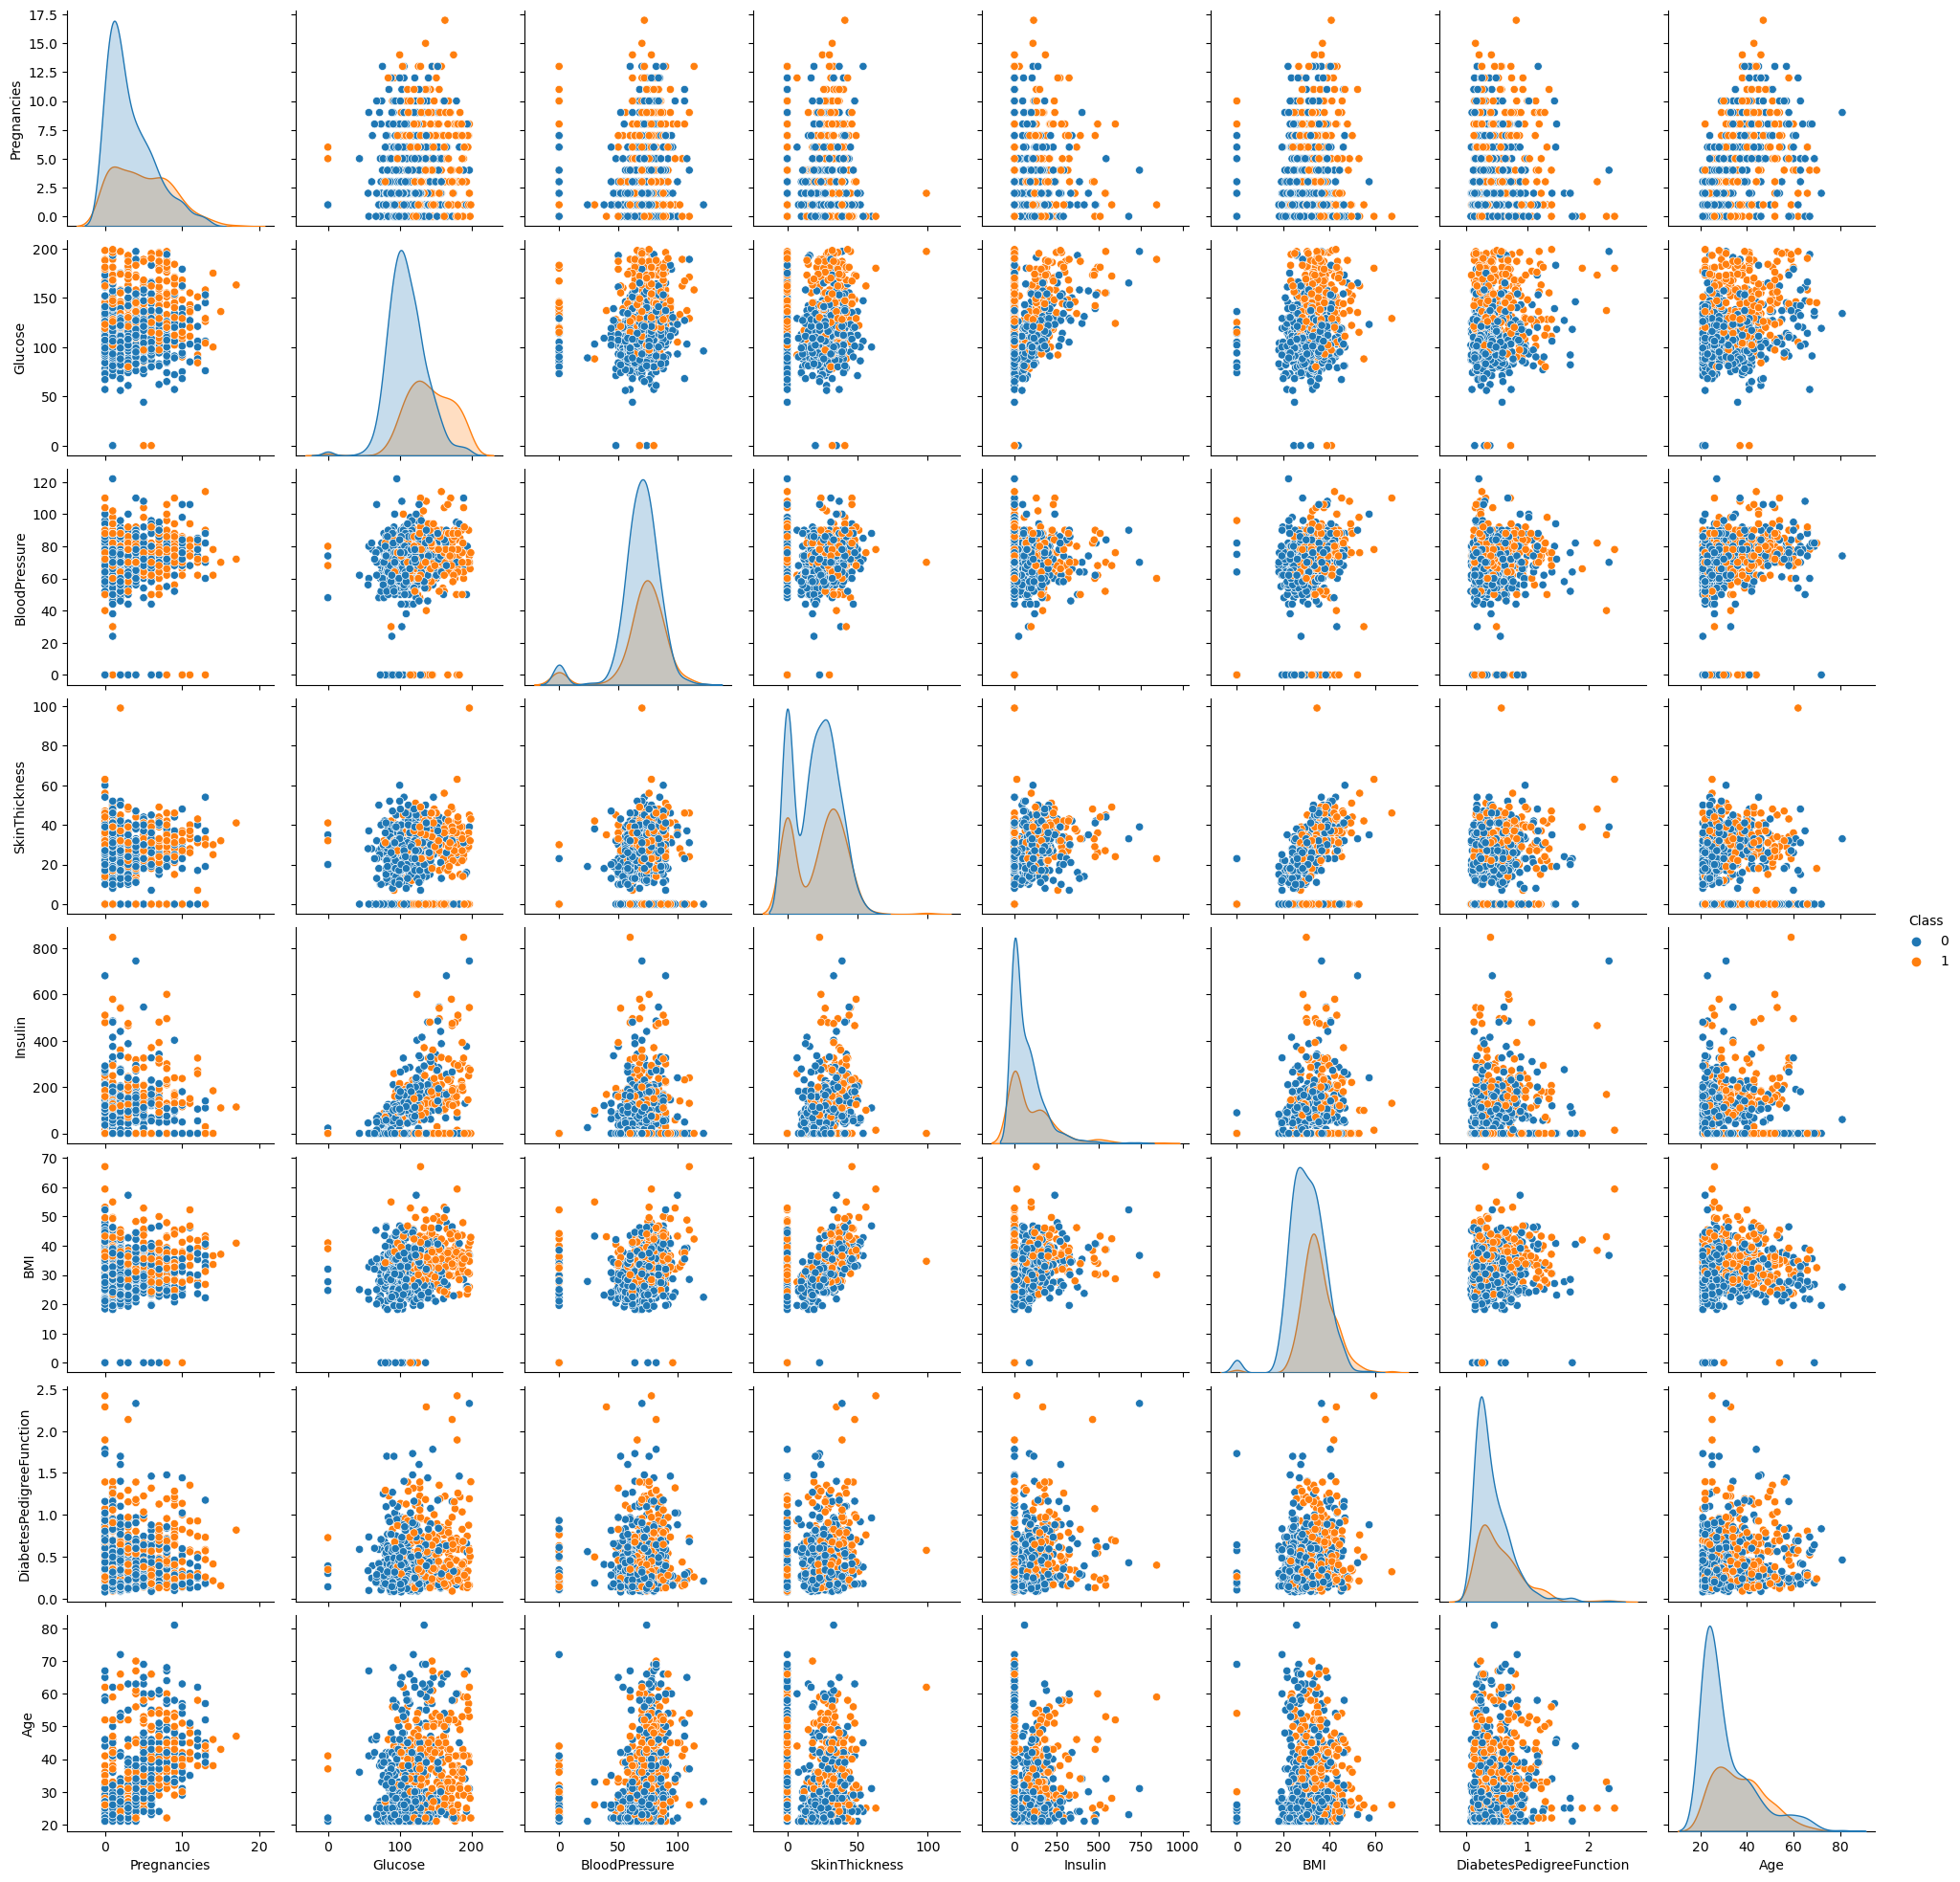

In [28]:
sns.pairplot(pima_diab, diag_kind="kde", hue= "Class")

Note: all the features distribution classes overlapping so its gonna be very difficult to distinguish between classes.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X= pima_diab.drop("Class", axis=1)
y= pima_diab["Class"]

In [10]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
from sklearn.linear_model import LogisticRegression

In [41]:
model= LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [42]:
y_pred= model.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [49]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

In [50]:
accuracy

0.7239583333333334

In [51]:
conf_matrix

array([[95, 28],
       [25, 44]], dtype=int64)

In [48]:
print(classification_report)

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       123
           1       0.61      0.64      0.62        69

    accuracy                           0.72       192
   macro avg       0.70      0.71      0.70       192
weighted avg       0.73      0.72      0.73       192



Note:  Despite Accuracy is 72% but the recall for class 1(Sensitivity or True positive rate 
                    i,e percentage model correctly predicted the diabetic class 1 ) is 64%

# Preprocess the data and apply Model

In [11]:
# lets to scaling
from sklearn.preprocessing import StandardScaler

In [12]:
# intiate scaling
scaler= StandardScaler()

In [13]:
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [14]:
# since we have imbalanced classes and also data size is small we will do over sampling using SMOTE
from imblearn.over_sampling import SMOTE

In [15]:
# initiate smote
smote= SMOTE(sampling_strategy="auto", random_state=42)

In [16]:
X_train_scaled_resampled, y_train_resampled= smote.fit_resample(X_train_scaled, y_train) 

In [19]:
# initiate and fit the model
log_reg= LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled_resampled, y_train_resampled)

LogisticRegression(random_state=42)

In [20]:
# evaluate model
y_pred = log_reg.predict(X_test_scaled)

In [27]:
# lets check the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classific_report = classification_report(y_test, y_pred)

In [28]:
accuracy

0.6927083333333334

In [29]:
conf_matrix

array([[84, 39],
       [20, 49]], dtype=int64)

In [30]:
print(classific_report)

              precision    recall  f1-score   support

           0       0.81      0.68      0.74       123
           1       0.56      0.71      0.62        69

    accuracy                           0.69       192
   macro avg       0.68      0.70      0.68       192
weighted avg       0.72      0.69      0.70       192



Note: now if you see the over all accuracy gone down to 69% and if you see recal(TruePositiveRate, i,e the % of Model 
                        predicting the class 1(diabetic) ) is high and its 71% now.It seems a good model than previous one. 